In [1]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [2]:
image_original = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

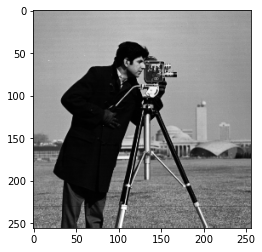

In [4]:
plt.imshow(image_original, cmap='gray')

In [ ]:
# Preprocessing the image before computing the DFT
N, M = ex2_input_image.shape
for i in range(N):
    for j in range(M):
        ex2_input_image[i, j] *= ((-1)**(i+j))

In [ ]:
# Preprocessing the image before computing the DFT
N, M = ex2_output_image.shape
for i in range(N):
    for j in range(M):
        ex2_output_image[i, j] *= ((-1)**(i+j))

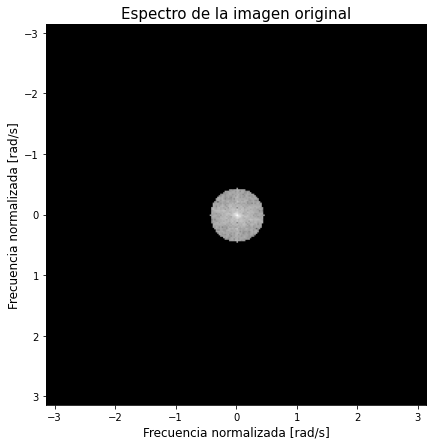

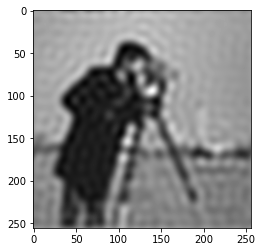

In [61]:
N, M = image_original.shape
factor = 7
spectrum = np.fft.fftshift(np.fft.fft2(image_original))
for i in range(N):
    for j in range(M):
        distance = (i - np.round(N / 2))**2 + (j - np.round(M / 2))**2
        if (distance > np.round(N / (2 * factor))**2):
            spectrum[i, j] = 0
            
plt.figure(figsize=(15, 7))
plt.imshow(np.log10(np.abs(spectrum) + 1), cmap='gray', extent=[-np.pi, np.pi, np.pi, -np.pi])
plt.xlabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.ylabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.title('Espectro de la imagen original', fontsize=15)
plt.show()

# Retrieve the filtered (or not) image in the space domain
image_low_pass = np.real(np.fft.ifft2(np.fft.fftshift(spectrum)))
plt.imshow(image_low_pass, cmap='gray')

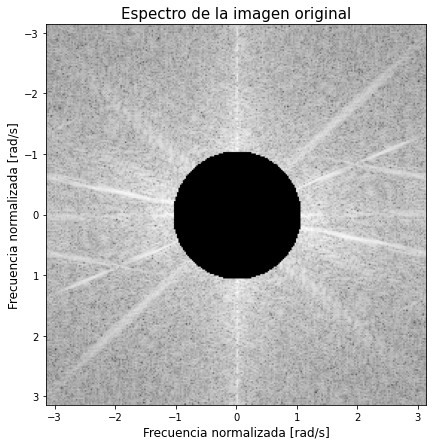

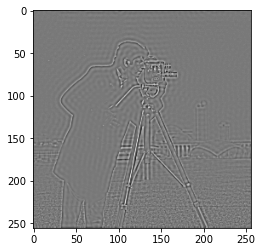

In [89]:
N, M = image_original.shape
factor = 3
spectrum = np.fft.fftshift(np.fft.fft2(image_original))
for i in range(N):
    for j in range(M):
        distance = (i - np.round(N / 2))**2 + (j - np.round(M / 2))**2
        if (distance < np.round(N / (2 * factor))**2):
            spectrum[i, j] = 0
            
plt.figure(figsize=(15, 7))
plt.imshow(np.log10(np.abs(spectrum) + 1), cmap='gray', extent=[-np.pi, np.pi, np.pi, -np.pi])
plt.xlabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.ylabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.title('Espectro de la imagen original', fontsize=15)
plt.show()

# Retrieve the filtered (or not) image in the space domain
image_high_pass = np.real(np.fft.ifft2(np.fft.fftshift(spectrum)))
plt.imshow(image_high_pass, cmap='gray')

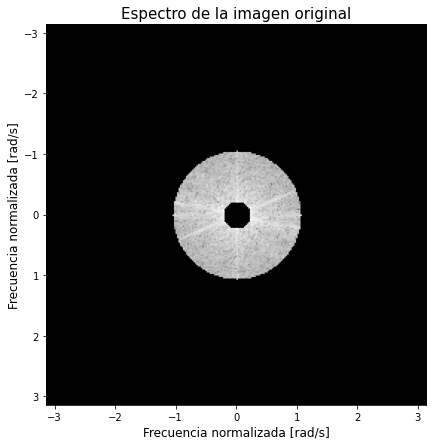

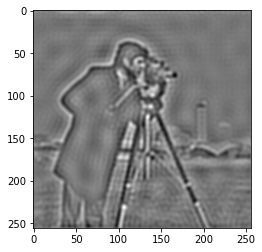

In [79]:
N, M = image_original.shape
l_factor = 3
h_factor = 14
spectrum = np.fft.fftshift(np.fft.fft2(image_original))
for i in range(N):
    for j in range(M):
        distance = (i - np.round(N / 2))**2 + (j - np.round(M / 2))**2
        if (distance < np.round(N / (2 * h_factor))**2) or (distance > np.round(N / (2 * l_factor))**2):
            spectrum[i, j] = 0
            
plt.figure(figsize=(15, 7))
plt.imshow(np.log10(np.abs(spectrum) + 1), cmap='gray', extent=[-np.pi, np.pi, np.pi, -np.pi])
plt.xlabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.ylabel('Frecuencia normalizada [rad/s]', fontsize=12)
plt.title('Espectro de la imagen original', fontsize=15)
plt.show()

# Retrieve the filtered (or not) image in the space domain
image_band_pass = np.real(np.fft.ifft2(np.fft.fftshift(spectrum)))
plt.imshow(image_band_pass, cmap='gray')